In [1]:
import pandas as pd


In [2]:
import talib



In [3]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\NVDA.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


Calculate Technical Indicators with TA-Lib

In [4]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                Close       High        Low       Open     Volume     SMA_20  \
Date                                                                           
2023-12-22  48.805527  49.358247  48.442706  49.170342  252507000  47.706983   
2023-12-26  49.254299  49.575137  48.935459  48.943454  244200000  47.759019   
2023-12-27  49.392231  49.655100  49.060397  49.486186  233648000  47.838989   
2023-12-28  49.497185  49.859003  49.387239  49.618126  246587000  47.908266   
2023-12-29  49.497185  49.971949  48.726571  49.788039  389293000  48.046003   

               EMA_20     RSI_14      MACD  MACD_signal  MACD_hist      upper  \
Date                                                                            
2023-12-22  48.024644  55.352119  0.634352     0.564438   0.069914  50.152737   
2023-12-26  48.141754  57.245971  0.655689     0.582688   0.073001  50.288523   
2023-12-27  48.260847  57.837928  0.675937     0.601338   0.074599  50.466927   
2023-12-28  48.378593  58.310919  

Visualize the Data

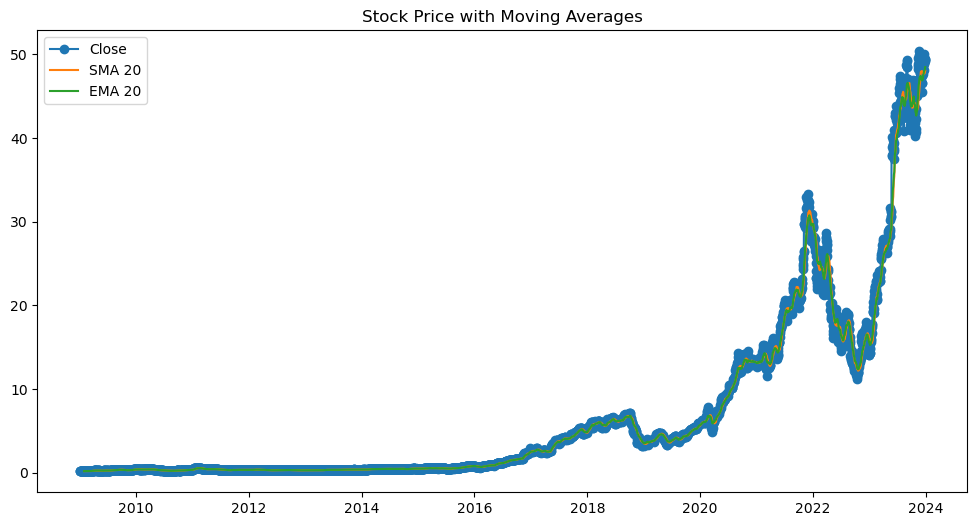

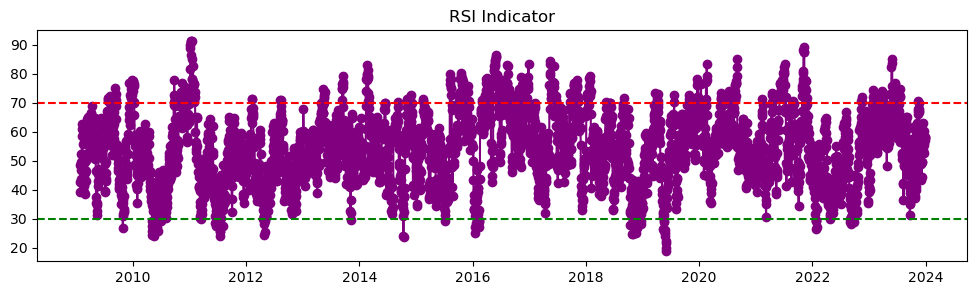

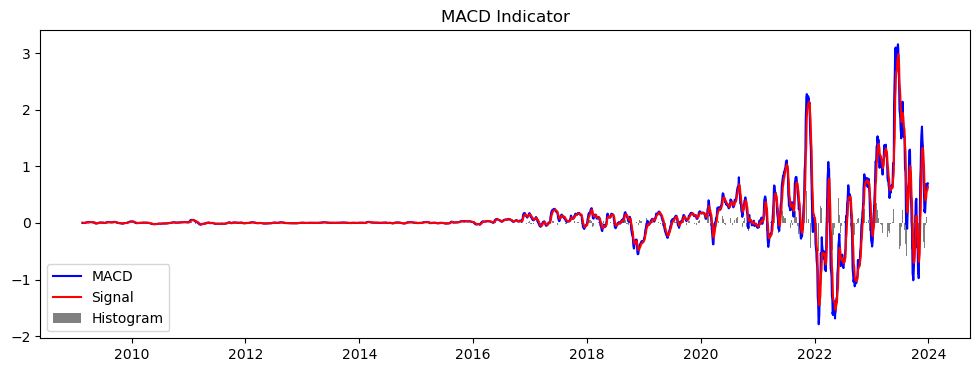

In [5]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
